Salary Prediction

In [1]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# Loading the data:

# df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

# df = pd.read_csv("/content/sample_data/Salary_dataset.csv")

In [3]:
# Checking some data statistics:

df.head()


,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [4]:
# Dropping unnamed column:

# df.drop(columns="Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [7]:
# Checking for duplicated values:

df.duplicated().value_counts()

False    30
Name: count, dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

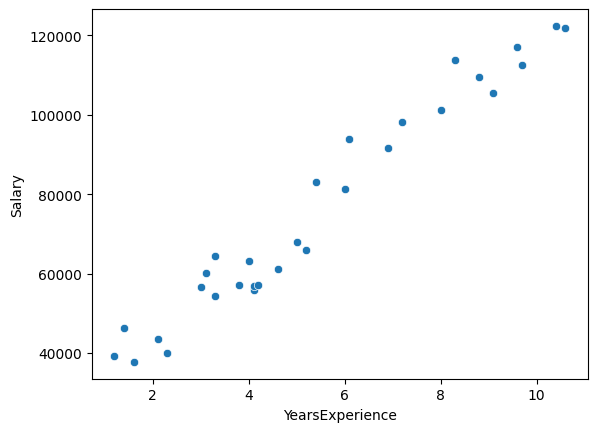

In [8]:
sns.scatterplot(x='YearsExperience', y='Salary', data=df)

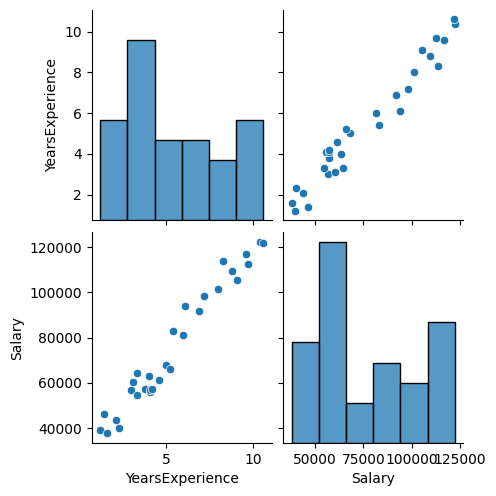

In [9]:
sns.pairplot(df)

We can see that there is a strong positive co-relation between years of experience vs. salary. That being said, this problem could be solved using Linear Regression.

In [10]:
# Doing the train / test split:

X = df.drop('Salary', axis=1) # Selecting features.

y = df['Salary'] # Selecting target variable.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
# Fitting the regression model:

model = LinearRegression() # Creating an instance.

model.fit(X_train, y_train) # Fitting the model.

LinearRegression()

In [12]:
# Predicting values:

y_pred = model.predict(X_test)

In [13]:
print("\n The slope co-efficient:" , float(model.coef_))
print("\n The intercept:" , model.intercept_)
print("\n RMSE Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\n R Score:", r2_score(y_test, y_pred))



 The slope co-efficient: 9577.171749746614

 The intercept: 25019.097484566482

 RMSE Error: 4240.095458517908

 R Score: 0.9746363787521535


R-score of 97% serves as an evidence that both variables are very strongly and positively co-related with each other.


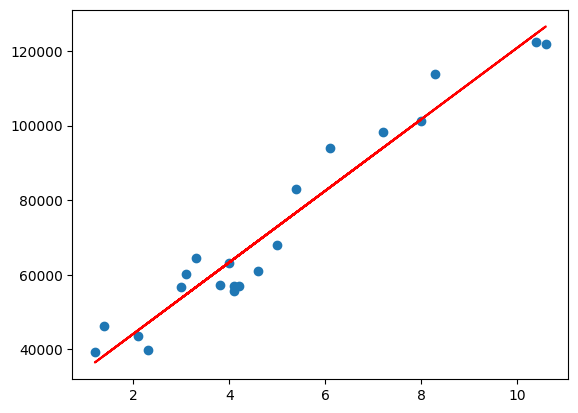

In [14]:
# Plotting the regression line over our data.

plt.scatter(X_train,y_train)
plt.plot(X_train, model.predict(X_train), c="r")
plt.show()

In [15]:
# Predicting if someone with 5 years of experience comes in:

new = 5

new = np.array(new).reshape(-1,1)

In [16]:
model.predict(new)

array([72904.9562333])

So someone with 5 years of experience can expect a salary of 72905.